In [11]:
# --- 1. Define Constants and Helper Function ---

# Prediction constants a and b for linear prediction (Equations 1 and 2)
# The paper's example (Figure 3b) used a=-1 and b=2 for the first linear prediction case.
A_CONSTANT = -1
B_CONSTANT = 2

def linear_prediction(s_k_minus_2, s_k_minus_1, a, b):
    """
    Calculates the predicted value s'(k) using linear prediction.
    s'(k) = a * s(k-2) + b * s(k-1)
    """
    return a * s_k_minus_2 + b * s_k_minus_1

# --- 2. Encoder (Algorithm 1) ---

def adaptive_dictionary_encoder(s_input_str, a=A_CONSTANT, b=B_CONSTANT):
    """
    Implements the Adaptive Dictionary Predictive Coding (Algorithm 1)[cite: 135].
    Input: a string of digitals (e.g., '2312312312').
    Output: a list of coded error digitals {e(k)}.
    """
    # Convert input string to a list of integers
    s_input = [int(d) for d in s_input_str]
    n = len(s_input)

    # Initialize the 2D Dictionary D.
    # The paper uses a 2D array, we use a dictionary-of-dictionaries for sparse data.
    # D[s(k-2)][s(k-1)] = s(k)
    dictionary_d = {}

    # Initialize the coded output list {e(k)}
    e_output = []

    print(f"--- Running Encoder (Algorithm 1) ---")
    print(f"Input Signal: {s_input_str}")
    print(f"Linear Prediction Coeffs: a={a}, b={b}\n")

    for k in range(n):
        s_k = s_input[k]

        if k < 2:
            e_k = s_k
            e_output.append(e_k)
            continue

        s_k_minus_2 = s_input[k - 2]
        s_k_minus_1 = s_input[k - 1]

        row_key = s_k_minus_2
        col_key = s_k_minus_1

        s_prime_k = None

        if row_key not in dictionary_d or col_key not in dictionary_d[row_key]:
            s_prime_k = linear_prediction(s_k_minus_2, s_k_minus_1, a, b)
        else:
            s_prime_k = dictionary_d[row_key][col_key]

        e_k = s_k - s_prime_k
        e_output.append(e_k)

        if row_key not in dictionary_d:
            dictionary_d[row_key] = {}
        dictionary_d[row_key][col_key] = s_k

    return e_output

print("Encoder function defined.")

Encoder function defined.


In [12]:
# --- 3. Decoder (Algorithm 2) ---

def adaptive_dictionary_decoder(e_input, a=A_CONSTANT, b=B_CONSTANT):
    """
    Implements the Predictive Decoding Algorithm (Algorithm 2)[cite: 249].
    Input: a list of error digitals {e(k)}.
    Output: a list of decoded output digitals {u(k)}.
    """
    n = len(e_input)

    # Initialize the 2D Dictionary H (same size as D)[cite: 210].
    # H[u(k-2)][u(k-1)] = u(k)
    dictionary_h = {}

    # Initialize the decoded output list {u(k)}
    u_output = []

    print(f"\n--- Running Decoder (Algorithm 2) ---")
    print(f"Input Error Signal: {e_input}")
    print(f"Linear Prediction Coeffs: a={a}, b={b}\n")


    for k in range(n):
        e_k = e_input[k]

        if k < 2:
            u_k = e_k
            u_output.append(u_k)
            # print(f"k={k+1}: e(k)={e_k}, Output u(k)={u_k} (Direct Output)")
            continue

        u_k_minus_2 = u_output[k - 2]
        u_k_minus_1 = u_output[k - 1]

        row_key = u_k_minus_2
        col_key = u_k_minus_1

        u_prime_k = None

        if row_key not in dictionary_h or col_key not in dictionary_h[row_key]:
            u_prime_k = linear_prediction(u_k_minus_2, u_k_minus_1, a, b)
        else:
            u_prime_k = dictionary_h[row_key][col_key]

        u_k = e_k + u_prime_k
        u_output.append(u_k)

        if row_key not in dictionary_h:
            dictionary_h[row_key] = {}
        dictionary_h[row_key][col_key] = u_k


    return u_output


# --- 4. Main Execution and Verification ---

def run_verification_test():
    """Runs the example from the paper (Figure 3 and 5) and verifies the result."""

    original_signal_str = '2312312312'
    original_signal_int = [int(d) for d in original_signal_str]

    encoded_output = adaptive_dictionary_encoder(original_signal_str)

    expected_encoded_output = [2, 3, -3, 3, 0, 0, 0, 0, 0, 0]

    print("\n" + "="*70)
    print("ENCODING VERIFICATION")
    print("="*70)
    print(f"Original Input:      {original_signal_int}")
    print(f"Encoder Output:      {encoded_output}")
    print(f"Expected Output:     {expected_encoded_output}")
    print(f"Encoding Match:      {'PASS' if encoded_output == expected_encoded_output else 'FAIL'}")

    decoded_output = adaptive_dictionary_decoder(encoded_output)

    expected_decoded_output = original_signal_int

    print("\n" + "="*70)
    print("DECODING VERIFICATION")
    print("="*70)
    print(f"Encoded Input:       {encoded_output}")
    print(f"Decoder Output:      {decoded_output}")
    print(f"Expected Output:     {expected_decoded_output}")
    print(f"Decoding Match:      {'PASS' if decoded_output == expected_decoded_output else 'FAIL'}")

    is_lossless = decoded_output == original_signal_int
    print(f"\nLossless Compression Check: {'PASS' if is_lossless else 'FAIL'}")

print("Decoder and Verification functions defined.")

Decoder and Verification functions defined.


In [13]:
run_verification_test()

--- Running Encoder (Algorithm 1) ---
Input Signal: 2312312312
Linear Prediction Coeffs: a=-1, b=2


ENCODING VERIFICATION
Original Input:      [2, 3, 1, 2, 3, 1, 2, 3, 1, 2]
Encoder Output:      [2, 3, -3, 3, 0, 0, 0, 0, 0, 0]
Expected Output:     [2, 3, -3, 3, 0, 0, 0, 0, 0, 0]
Encoding Match:      PASS

--- Running Decoder (Algorithm 2) ---
Input Error Signal: [2, 3, -3, 3, 0, 0, 0, 0, 0, 0]
Linear Prediction Coeffs: a=-1, b=2


DECODING VERIFICATION
Encoded Input:       [2, 3, -3, 3, 0, 0, 0, 0, 0, 0]
Decoder Output:      [2, 3, 1, 2, 3, 1, 2, 3, 1, 2]
Expected Output:     [2, 3, 1, 2, 3, 1, 2, 3, 1, 2]
Decoding Match:      PASS

Lossless Compression Check: PASS


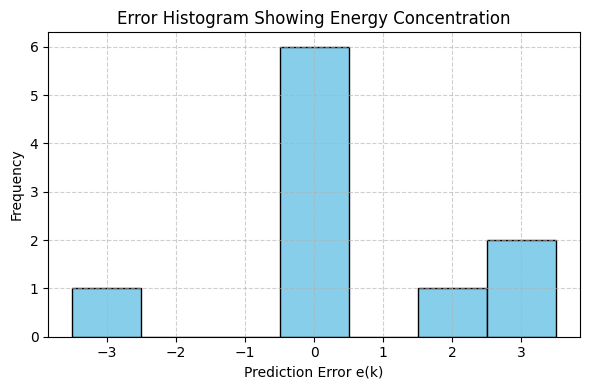

✅ error_histogram.png saved successfully.


In [14]:
import matplotlib.pyplot as plt

error_values = [2, 3, -3, 3, 0, 0, 0, 0, 0, 0]

plt.figure(figsize=(6, 4))
plt.hist(error_values, bins=range(min(error_values), max(error_values) + 2),
         edgecolor='black', align='left', color='skyblue')

plt.title('Error Histogram Showing Energy Concentration')
plt.xlabel('Prediction Error e(k)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('error_histogram.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ error_histogram.png saved successfully.")